# Customer Churn Prediction Project

## Overview

This project builds a machine learning pipeline to predict customer churn using the Telco Customer Churn dataset. Customer churn prediction helps businesses identify customers likely to cancel their services, enabling proactive retention strategies.

**Dataset**: Telco Customer Churn from Kaggle
**Target Variable**: Churn (Yes/No)
**Problem Type**: Binary Classification

### Dataset Description
The dataset contains 7,043 customer records with 21 features including:
- **Customer Demographics**: Gender, SeniorCitizen, Partner, Dependents
- **Service Information**: Phone service, Multiple lines, Internet service, Online security, etc.
- **Account Information**: Contract type, Payment method, Paperless billing
- **Financial Data**: Monthly charges, Total charges, Tenure
- **Target**: Churn (customers who left within the last month)

### Project Structure
1. Data Loading and Exploration
2. Data Preprocessing and Cleaning
3. Exploratory Data Analysis
4. Feature Engineering
5. Class Imbalance Handling
6. Model Training and Evaluation
7. Model Comparison and Selection


## Section 1: Environment Setup and Data Loading  
**Purpose:** Import libraries and load dataset for analysis  


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')

In [2]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (7043, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

In [3]:
print("First 5 rows:")
df.head()

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## Section 2: Data Exploration  
**Purpose:** Understand target-variable distribution and identify data-quality issues  


In [5]:
# Check target variable distribution
print("Churn Distribution:")
print(df['Churn'].value_counts())
print(f"\nChurn Rate: {df['Churn'].value_counts()['Yes'] / len(df) * 100:.2f}%")


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


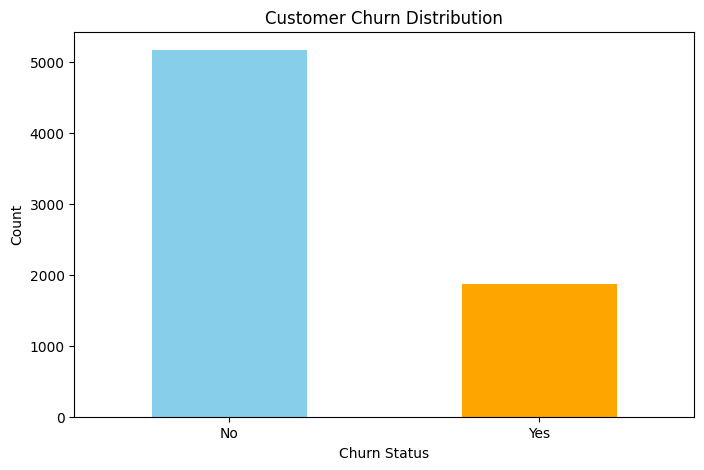

In [6]:
# Visualize churn distribution
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Customer Churn Distribution')
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.xticks(rotation=0)
plt.show()


In [7]:
# Check for missing values and data types
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod       

In [8]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Churn')  # Remove target variable
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


## Section 3: Data Preprocessing and Cleaning
**Purpose:** Clean data and handle missing values before feature engineering  


In [9]:
# Handle TotalCharges column - convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Missing values in TotalCharges after conversion:", df['TotalCharges'].isnull().sum())

# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

Missing values in TotalCharges after conversion: 11


In [10]:
# Convert binary categorical variables to numerical
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert gender to numerical
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

# Convert target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [11]:
# Handle multi-category variables with Label Encoding
multi_cat_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

label_encoders = {}
for col in multi_cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Label encoding completed for multi-category variables")


Label encoding completed for multi-category variables


## Section 4: Exploratory Data Analysis  
**Purpose:** Understand relationships between features and the target variable  


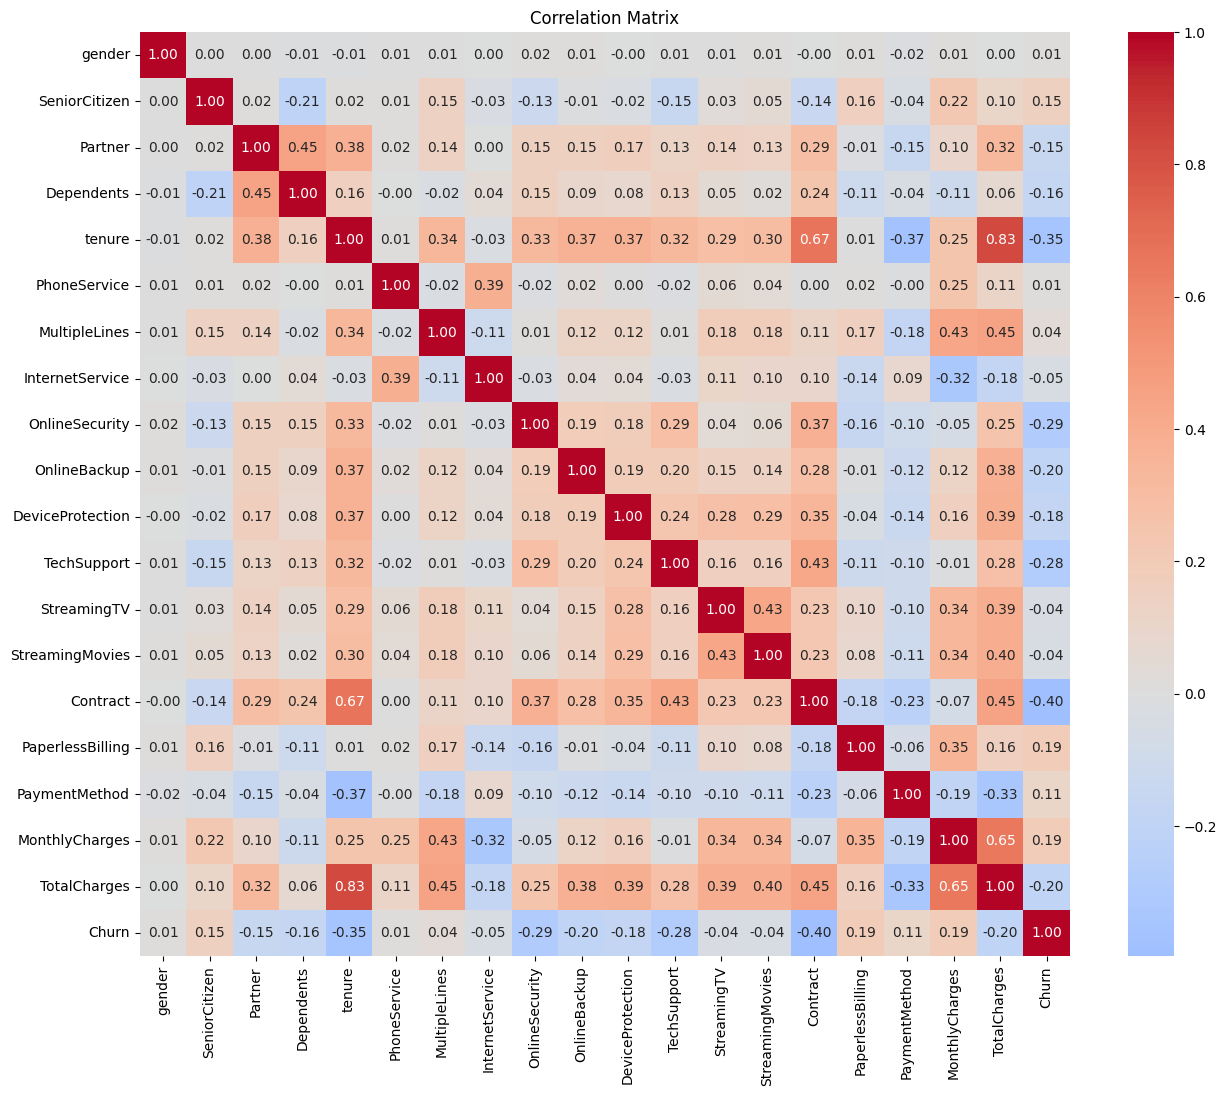

In [12]:
# Correlation matrix for numeric columns
plt.figure(figsize=(15, 12))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Feature correlation with target variable
target_corr = numeric_df.corr()['Churn'].sort_values(ascending=False)
print("Features most correlated with Churn:")
print(target_corr.head(10))


Features most correlated with Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender              0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
Name: Churn, dtype: float64


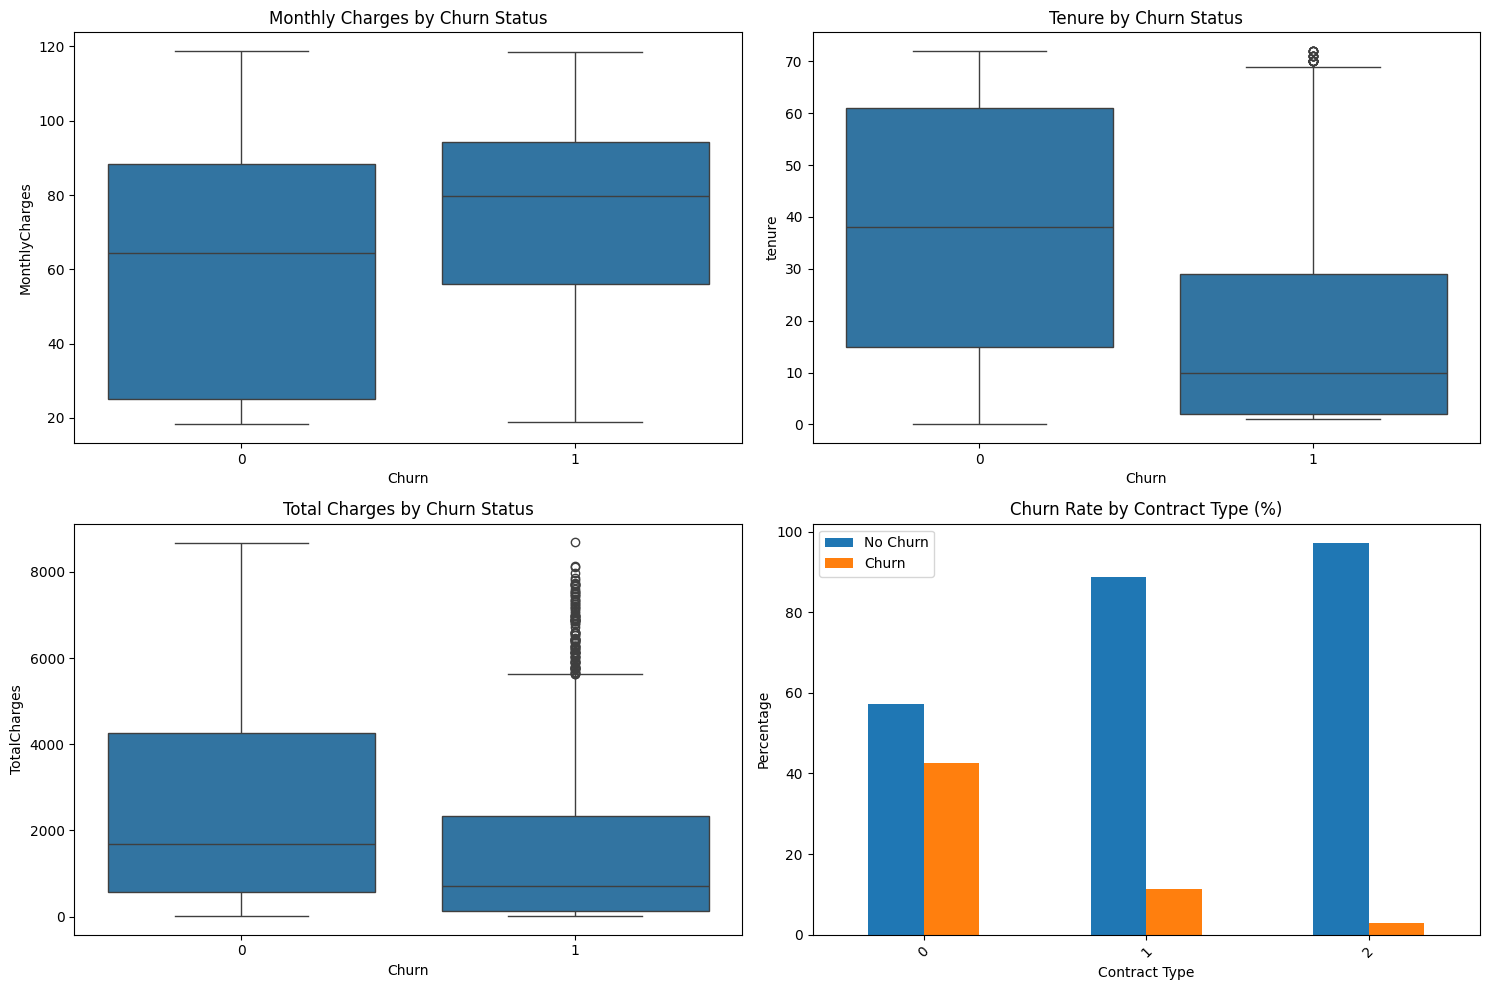

In [14]:
# Visualize key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly Charges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[0,0])
axes[0,0].set_title('Monthly Charges by Churn Status')

# Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0,1])
axes[0,1].set_title('Tenure by Churn Status')

# Total Charges vs Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges', ax=axes[1,0])
axes[1,0].set_title('Total Charges by Churn Status')

# Contract vs Churn rate
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Churn Rate by Contract Type (%)')
axes[1,1].set_xlabel('Contract Type')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(['No Churn', 'Churn'])
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Section 5: Feature Engineering  
**Purpose:** Create new meaningful features to improve model performance  

In [15]:
# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72],
                           labels=['0-1 year', '1-2 years', '2-4 years', '4+ years'])
df['tenure_group'] = df['tenure_group'].cat.codes

# Average monthly charges per tenure month
df['avg_charges_per_month'] = df['TotalCharges'] / (df['tenure'] + 1)

# High value customer indicator
df['high_value_customer'] = (df['TotalCharges'] > df['TotalCharges'].quantile(0.75)).astype(int)

print("New features created:")
print("- tenure_group: Categorical tenure buckets")
print("- avg_charges_per_month: Average monthly spending")
print("- high_value_customer: Top 25% customers by total charges")


New features created:
- tenure_group: Categorical tenure buckets
- avg_charges_per_month: Average monthly spending
- high_value_customer: Top 25% customers by total charges


## Section 6: Train-Test Split
**Purpose:** Split data before scaling to prevent data leakage  

In [16]:
# Prepare features and target
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

print("Feature set shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True))


Feature set shape: (7043, 22)
Target distribution:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))


Training set shape: (5634, 22)
Test set shape: (1409, 22)
Training set class distribution:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


## Section 7: Feature Scaling
**Purpose:** Standardize features for algorithms sensitive to scale differences  


In [18]:
# Scale numerical features after train-test split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Features scaled using StandardScaler
Training set shape: (5634, 22)
Test set shape: (1409, 22)


## Section 8: Class Imbalance Handling  
**Purpose:** Balance dataset using SMOTE to improve minority-class prediction  

In [19]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Original training set:")
print("Shape:", X_train_scaled.shape)
print("Class distribution:", np.bincount(y_train))

print("\nBalanced training set:")
print("Shape:", X_train_balanced.shape)
print("Class distribution:", np.bincount(y_train_balanced))


Original training set:
Shape: (5634, 22)
Class distribution: [4139 1495]

Balanced training set:
Shape: (8278, 22)
Class distribution: [4139 4139]


## Section 9: Model Training and Evaluation  
**Purpose:** Train multiple models and compare their performance  

In [20]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB()
}

# Store results
results = {}


In [21]:
# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_balanced, y_train_balanced)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'auc_score': auc_score
    }

    print(f"AUC Score: {auc_score:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Training Logistic Regression...
AUC Score: 0.8446
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.79      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

--------------------------------------------------
Training Random Forest...
AUC Score: 0.8258
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1035
           1       0.56      0.57      0.56       374

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

--------------------------------------------------
Training Gradient Boosting...
AUC Score: 0.8390
Classification Report:
              precision    recall

## Section 10: Hyperparameter Tuning  
**Purpose:** Optimize top-performing models for better performance  

In [22]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Performing hyperparameter tuning for Random Forest...")
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train_balanced, y_train_balanced)

print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)


Performing hyperparameter tuning for Random Forest...
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.933900803002631


In [23]:
# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

print("Performing hyperparameter tuning for Gradient Boosting...")
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
gb_grid.fit(X_train_balanced, y_train_balanced)

print("Best parameters:", gb_grid.best_params_)
print("Best cross-validation score:", gb_grid.best_score_)


Performing hyperparameter tuning for Gradient Boosting...
Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation score: 0.9377728441116429


## Section 11: Final Model Evaluation (Corrected)  
**Purpose:** Evaluate tuned models and select the best performer  


In [24]:
# Evaluate tuned models
tuned_models = {
    'Tuned Random Forest': rf_grid.best_estimator_,
    'Tuned Gradient Boosting': gb_grid.best_estimator_
}

# Add tuned models to results
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'auc_score': auc_score
    }


In [25]:
# Compare all models
print("Model Comparison:")
print("-" * 50)
model_comparison = []

for name, result in results.items():
    model_comparison.append({
        'Model': name,
        'AUC Score': result['auc_score']
    })

comparison_df = pd.DataFrame(model_comparison)
comparison_df = comparison_df.sort_values('AUC Score', ascending=False)
print(comparison_df)


Model Comparison:
--------------------------------------------------
                     Model  AUC Score
0      Logistic Regression   0.844568
2        Gradient Boosting   0.839010
6  Tuned Gradient Boosting   0.827627
5      Tuned Random Forest   0.827057
1            Random Forest   0.825839
4              Naive Bayes   0.817373
3                      SVM   0.816082


In [26]:
# Identify and analyze best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']
best_probabilities = results[best_model_name]['probabilities']

print(f"Best Model: {best_model_name}")
print(f"Best AUC Score: {results[best_model_name]['auc_score']:.4f}")


Best Model: Logistic Regression
Best AUC Score: 0.8446


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Detailed evaluation of best model
print(f"Detailed Evaluation of {best_model_name}:")
print("=" * 60)

# Classification report
print("Classification Report:")
print(classification_report(y_test, best_predictions))

# Calculate additional metrics
precision = precision_score(y_test, best_predictions)
recall = recall_score(y_test, best_predictions)
f1 = f1_score(y_test, best_predictions)

print(f"\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Detailed Evaluation of Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.79      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409


Additional Metrics:
Precision: 0.5157
Recall: 0.7888
F1-Score: 0.6237


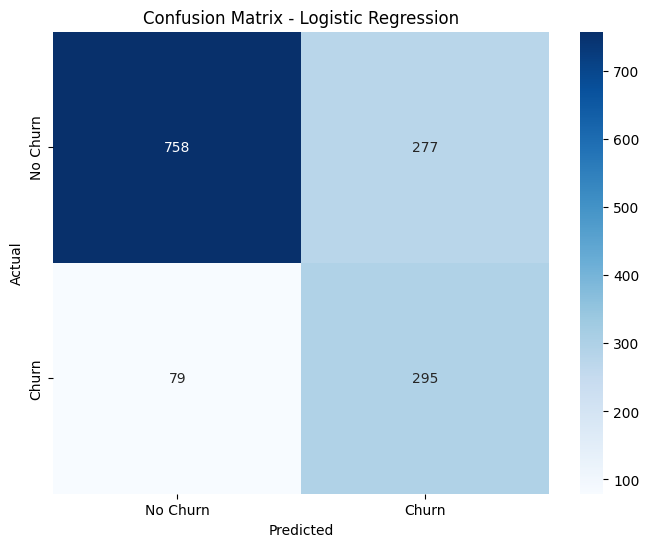

In [29]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


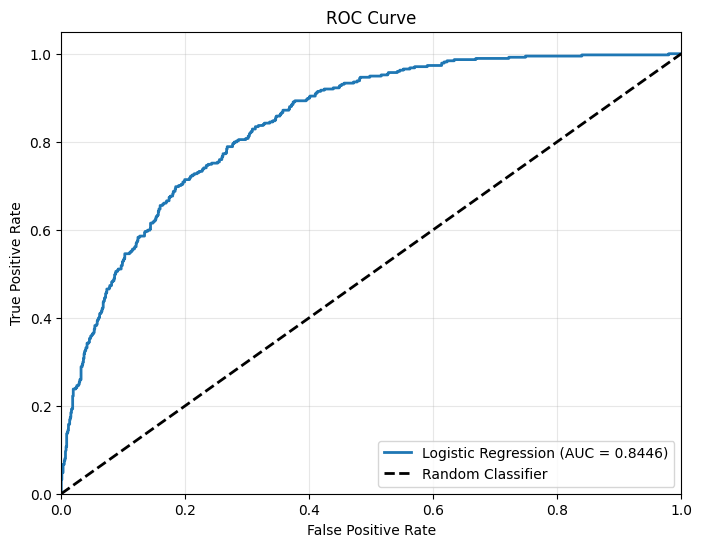

In [30]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, best_probabilities)
plt.plot(fpr, tpr, linewidth=2,
         label=f'{best_model_name} (AUC = {results[best_model_name]["auc_score"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


In [31]:
# Feature importance analysis
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), y='feature', x='importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))


## Section 12: Final Results Summary  
**Purpose:** Provide comprehensive summary of model performance and insights  

In [32]:
# Final summary
print("=" * 60)
print("CUSTOMER CHURN PREDICTION - FINAL RESULTS")
print("=" * 60)

print(f"Dataset Size: {df.shape[0]} customers")
print(f"Number of Features: {X.shape}")
print(f"Churn Rate: {y.mean():.1%}")

print(f"\nBest Model: {best_model_name}")
print(f"AUC Score: {results[best_model_name]['auc_score']:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nModel Performance Interpretation:")
print(f"- The model correctly identifies {recall:.1%} of customers who will churn")
print(f"- Of customers predicted to churn, {precision:.1%} actually churn")
print(f"- Overall model discrimination ability (AUC): {results[best_model_name]['auc_score']:.1%}")

print("\nBusiness Impact:")
print("- Model can help identify at-risk customers for targeted retention campaigns")
print("- Focus retention efforts on high-probability churn predictions")
print("- Monitor feature importance for business strategy insights")


CUSTOMER CHURN PREDICTION - FINAL RESULTS
Dataset Size: 7043 customers
Number of Features: (7043, 22)
Churn Rate: 26.5%

Best Model: Logistic Regression
AUC Score: 0.8446
Precision: 0.5157
Recall: 0.7888
F1-Score: 0.6237

Model Performance Interpretation:
- The model correctly identifies 78.9% of customers who will churn
- Of customers predicted to churn, 51.6% actually churn
- Overall model discrimination ability (AUC): 84.5%

Business Impact:
- Model can help identify at-risk customers for targeted retention campaigns
- Focus retention efforts on high-probability churn predictions
- Monitor feature importance for business strategy insights
